<h1><center>Laboratorio 3: El Pandas no muerde (act. I) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Patricio Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Pablo Esteban Zúñiga Varela
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `https://github.com/PabloZV/Laboratorio-de-Programacion-Cientifica-para-Ciencia-de-Datos`

### Reglas:

- Fecha de entrega: 22 de abril (atrasos hasta el 28 de abril, 1 pto de descuento por día)
- **Grupos de máximo 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px

# Librerias utiles
from sklearn.preprocessing import StandardScaler

# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos. 
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados. 




In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1.1 Carga e Inspección de Datos [1.5 Puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>


*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset. 


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [3]:
import pandas as pd
df_grades = pd.read_json (r'students_grades.json')



<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **875** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **875** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier alumno que posea un valor diferente a esta escala, debería ser eliminado de la base de datos.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas. 

**To-Do**
1. [X] Imprimir un mensaje con las dimensiones del Dataframe.
2. [ ] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [ ] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [ ] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [ ] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [ ] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [ ] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [ ] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).
9. [ ] A traves de `.plot.box()` plotear el boxplot de las notas. De ser necesario, invetigue como funcionan los gráficos de caja (esta sección es provista).
10. [ ] Finalmente responda la siguiente pregunta:

> ¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot? (), comente esto en la celda ubicada debajo de **justificación**.

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c) 

**Respuesta:**

In [4]:
import matplotlib.pyplot as plt

def exploratory_data_analysis(dataframe:pd.DataFrame):
    print(f'Dimensiones:\n{dataframe.shape}')
    print(f'Columnas:\n[{",".join(dataframe.columns)}]')
    print(f'Primeros 5 elementos:)')
    display(dataframe.head(5))
    print(f'Ultimos 5 elementos:')
    display(dataframe.tail(5))
    print(f'5 Elementos aleatorios:')
    display(dataframe.sample(5))
    print(f'Descripción rápida:')
    display(dataframe.describe())
    print(f'Cantidad de valores nulos:')
    display(dataframe.isna().sum())
    print(f'Cantidad de valores únicos:\n{dataframe.nunique()}')
    datos_con_nombres_duplicados=dataframe[dataframe.duplicated(['names'], keep=False)]
    print(f'Cantidad de filas con nombres duplicados:\n{datos_con_nombres_duplicados.shape[0]}')
    print(f'Filas con valores duplicados:\n ')
    display(datos_con_nombres_duplicados.sort_values(['names']))
    print('Boxplot de notas')
    pd.DataFrame(pd.to_numeric(dataframe['math score'])).boxplot('math score')
    plt.figure()
    pd.DataFrame(pd.to_numeric(dataframe['reading score'])).boxplot('reading score')
    plt.figure()
    pd.DataFrame(pd.to_numeric(dataframe['writing score'])).boxplot('writing score')


**Justificación:**

```
Se observa la anomalía de que casi un tercio de los nombres están reptidos. También que la cantidad de valores duplicados (493) es mayor a la cantidad de nombres que se repiten (1400-1153=247), esto quiere decir que hay nombres que serepiten varias veces. También notar que las notas deberían ser valores numéricos, pero se están considerando como str, y que hay notas sobre el 100, cosa que por enunciado no debería ocurrir. No hay valores nulos, aunque algunos están catalogados como none, esto podría ser una categoría legítima de los datos. En los Boxplot se observa una cantidad no menor de outliers en cada boxplot, y que las distribuciones de reading, writing y math scores son muy similares.
```

**Respuesta Esperada:**

Dimensiones:
(1400, 9)
Columnas:
[names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score]
Primeros 5 elementos:)


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37,46,46
1,Madeline Fuller,female,group C,some high school,standard,none,124,142,142
2,Daniel Rester,male,group E,associate's degree,standard,none,156,196,193
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80,78,81
4,Geraldine Hale,female,group A,associate's degree,standard,none,131,166,166


Ultimos 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193,142,193
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66,74,81
1397,Laurie Carter,female,group B,some high school,standard,completed,54,61,62
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193,196,193
1399,Amanda Perez,female,group A,high school,standard,completed,68,80,76


5 Elementos aleatorios:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
265,David Moss,male,group D,some college,standard,completed,85,81,85
112,John Salter,male,group D,some college,standard,none,44,54,53
72,Charles Kong,male,group C,associate's degree,standard,completed,131,142,193
784,Paul Smith,male,group B,high school,standard,none,70,65,60
1224,Susan Proctor,female,group D,master's degree,standard,none,124,193,193


Descripción rápida:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1400,1400,1400,1400,1400,1400,1400,1400,1400
unique,1153,2,5,6,2,2,97,89,93
top,Robert Frazier,female,group C,some college,standard,none,193,193,193
freq,3,723,452,334,904,898,120,117,133


Cantidad de valores nulos:


names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Cantidad de valores únicos:
names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       97
reading score                    89
writing score                    93
dtype: int64
Cantidad de filas con nombres duplicados:
493
Filas con valores duplicados:
 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
422,Aaron Oakden,male,group D,high school,free/reduced,none,66,74,69
441,Aaron Oakden,male,group D,high school,free/reduced,none,,193,124
329,Adam Romero,male,group C,high school,standard,completed,53,52,49
1393,Adam Romero,male,group C,high school,standard,completed,124,193,49
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193,142,193
...,...,...,...,...,...,...,...,...,...
1023,William Saska,male,group B,associate's degree,standard,none,193,42,142
42,Willie Neff,female,group E,associate's degree,free/reduced,none,73,76,78
476,Willie Neff,female,group E,associate's degree,free/reduced,none,,193,142
1060,Zachary Glenn,male,group E,some college,standard,completed,188,124,142


Boxplot de notas


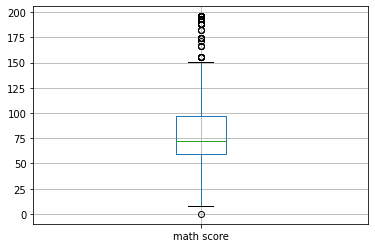

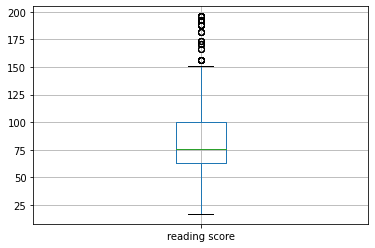

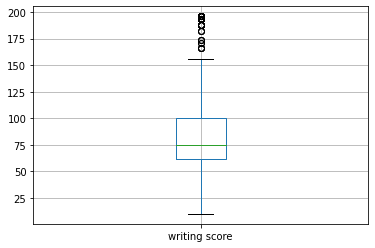

In [5]:
exploratory_data_analysis(df_grades)

## 1.2 Limpieza de Datos [1 punto]

<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>


En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y cree una función que le permita limpiar los datos. Una vez limpiado cada uno de los `DataFrames` compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**

- [ ] Crear función que permita limpiar el dataset.
- [ ] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hint**

Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.


**Respuesta:**

Dimensiones:
(875, 9)
Columnas:
[names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score]
Primeros 5 elementos:)


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0


Ultimos 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0


5 Elementos aleatorios:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
253,Tanya Favela,female,group D,associate's degree,free/reduced,completed,57.0,74.0,76.0
442,Celeste Petch,female,group E,associate's degree,free/reduced,none,50.0,56.0,54.0
1250,Bertha Nelson,female,group B,some high school,standard,none,41.0,55.0,51.0
172,Janice Wells,female,group D,high school,free/reduced,completed,65.0,61.0,71.0
45,Mary Piotrowski,female,group E,some college,free/reduced,completed,75.0,88.0,85.0


Descripción rápida:


,math score,reading score,writing score
count,875.000000,875.000000,875.000000
mean,66.225143,69.195429,68.114286
std,15.076716,14.629270,15.174220
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.500000
50%,66.000000,70.000000,69.000000
75%,76.500000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Cantidad de valores nulos:


names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Cantidad de valores únicos:
names                          875
gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      79
reading score                   72
writing score                   77
dtype: int64
Cantidad de filas con nombres duplicados:
0
Filas con valores duplicados:
 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


Boxplot de notas


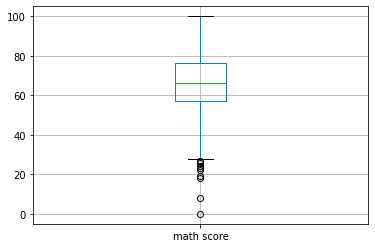

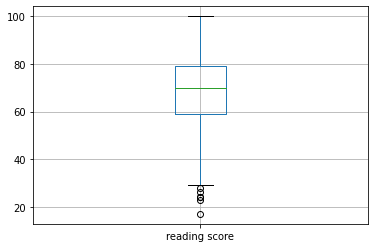

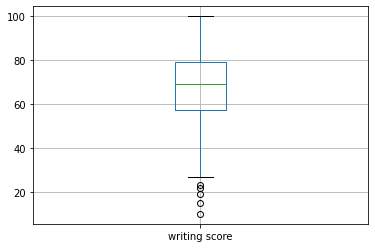

In [6]:
def clean_data(dataframe):
    df=dataframe.copy()
    df=df.drop_duplicates(subset=['names'])
    for score_name in ['math score','reading score','writing score']:
        df[score_name]=pd.to_numeric(df[score_name])
        df=df[df[score_name] <= 100]   
        df=df[df[score_name] >= 0] 
    df=df.dropna()
    return df


clear_df_grades = clean_data(df_grades)
clear_df_grades
exploratory_data_analysis(clear_df_grades)

> Utilice la función creada en el punto 1.1 para verificar sus resultados.

**Justificación:**

```
Escriba aquí su justificación
```

## 1.3 Trabajando con Datos

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 1.3.1 Transformación de notas a "Nota Chilena" [0.5 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas que se escapan del rango [1,7] y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [ ] Tranforme los valores a la escala chilena.

**Respuesta:**

In [7]:
def nota_chilena(dataframe_in, columna):
  dataframe_in=clean_data(dataframe_in)
  dataframe_in=dataframe_in.round(2)
  dataframe_in.loc[dataframe_in[columna] >7, columna] *= 7/100
  dataframe_in.loc[dataframe_in[columna] <1, columna] *= 7/100
  return dataframe_in[columna]
clear_df_grades = clean_data(df_grades)
display(clear_df_grades)
nota_chilena(clear_df_grades,'math score')
display(nota_chilena(clear_df_grades,'math score'))
display(clear_df_grades)

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


0       2.59
3       5.60
5       5.11
6       5.67
7       6.58
        ... 
1392    4.83
1394    1.61
1396    4.62
1397    3.78
1399    4.76
Name: math score, Length: 875, dtype: float64

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


### 1.3.2 Obtención de promedio de alumnos [0.5]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del DataFrame original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [ ] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el DataFrame original.


**Respuesta:**

In [8]:
def alumnos_promedio(dataframe_in):
  #for score_name in ['math score','reading score','writing score']:
  dataframe_in['GPA']=nota_chilena(dataframe_in,'math score')/3 + nota_chilena(dataframe_in,'reading score')/3 + nota_chilena(dataframe_in,'writing score')/3
  dataframe_in=dataframe_in.round(2)
  return dataframe_in['GPA']

**Respuesta Esperada:**

In [9]:
averages = alumnos_promedio(clear_df_grades)
averages.head()


0    3.01
3    5.58
5    4.71
6    5.41
7    6.23
Name: GPA, dtype: float64

### 1.3.3 Reprobados y Destacados [1.5 Punto, 0.5 Cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes: 
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [ ] Obtener DataFrame con los alumnos que reprobaron el año.
- [ ] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [ ] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [10]:
def reprobados_destacados(dataframe_in):
    clear_df_grades = clean_data(dataframe_in)
    alumnos_promedio(clear_df_grades)
    data_con_promedios=clear_df_grades.copy()
    data_con_promedios['GPA']=alumnos_promedio(clear_df_grades.copy())
    reprobados = data_con_promedios[data_con_promedios['GPA']<4].copy()
    reprobados_R=data_con_promedios.copy()
    reprobados_R.loc[reprobados_R['GPA'] <4, 'GPA'] = 'R'
    destacados=data_con_promedios[data_con_promedios['GPA']>5.8].sort_values(by='GPA',ascending=False).copy()
    return reprobados,reprobados_R,destacados
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)


In [11]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)
dataframe1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0,3.01
13,Mikki Amaya,female,group A,high school,free/reduced,completed,34.0,48.0,41.0,2.87
26,Samuel Dougal,male,group C,master's degree,free/reduced,completed,46.0,42.0,46.0,3.13
37,Connie Shinn,female,group B,associate's degree,free/reduced,none,46.0,61.0,55.0,3.78
52,Lisa Watters,female,group D,master's degree,free/reduced,none,40.0,59.0,54.0,3.57
...,...,...,...,...,...,...,...,...,...,...
1371,Charles Harian,male,group C,some high school,free/reduced,completed,45.0,52.0,49.0,3.41
1373,Wendy Gunnell,female,group D,some high school,free/reduced,none,27.0,34.0,32.0,2.17
1389,Diana Costa,female,group C,high school,free/reduced,none,41.0,46.0,43.0,3.03
1391,Amy Sieving,female,group C,high school,standard,none,29.0,29.0,30.0,2.05


In [12]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0,R
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0,5.58
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0,4.71
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0,5.41
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0,6.23
...,...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0,5.02
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0,R
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0,5.16
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0,4.13


In [13]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
677,Richard Pryor,male,group E,bachelor's degree,standard,completed,100.0,100.0,100.0,7.00
1352,Sandra Pompey,female,group E,associate's degree,standard,none,100.0,100.0,100.0,7.00
384,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,100.0,100.0,100.0,7.00
475,Emma Gray,female,group E,bachelor's degree,standard,completed,99.0,100.0,100.0,6.98
279,Emma Brasher,female,group D,some high school,standard,completed,97.0,100.0,100.0,6.93
...,...,...,...,...,...,...,...,...,...,...
393,Christopher Martinez,male,group C,bachelor's degree,standard,completed,83.0,82.0,84.0,5.81
820,Nicole Obrien,female,group B,bachelor's degree,free/reduced,none,77.0,85.0,87.0,5.81
1044,Karen Wagaman,female,group B,associate's degree,standard,none,80.0,86.0,83.0,5.81
1077,Danny Goodyear,male,group B,some college,standard,completed,88.0,85.0,76.0,5.81


**Respuesta:**

```
Escriba aqui su respuesta
```

### 1.3.4 Consultas de Alumnos [0.5 Puntos]

Algunos padres (extremadamente entrometidos y...) preocupados por el desempeño de sus hijos, desean saber estos han aprobado o no el año. Como la tarea de buscar a mano cada uno de estos alumnos en el `DataFrame` resulta demasiado tedioso, el rector le solicita crear una función que tenga como entrada el `DataFrame` donde se realizará la busqueda y una lista con los nombres de los alumnos, luego la función deberá retornar un `DataFrame` con los nombres de los alumnos y el promedio general de cada uno. 

Creada la función busque el promedio general de los siguientes alumnos en el segundo Data frame creado en la sección 1.3.3:

`['Lucille Stanphill','Marcus Mcfarland', 'Matthew Freeman', 'Dana Mojica', 'Paul Hyder', 'Jeffrey Korn', 'Robert Strain',
'Ronald Jett', 'Lorena Reed', 'Hazel Posey']`

**Hint:** Puede serle de utilidad utilizar `isin()`.

**Respuesta:**

In [14]:
def consulta_gpa(dataframe_in, lista_alumnos):
    _, df, _ = reprobados_destacados(dataframe_in)
    return df[df['names'].isin(lista_alumnos)].copy()

lista_alumnos = [
    "Lucille Stanphill",
    "Marcus Mcfarland",
    "Matthew Freeman",
    "Dana Mojica",
    "Paul Hyder",
    "Jeffrey Korn",
    "Robert Strain",
    "Ronald Jett",
    "Lorena Reed",
    "Hazel Posey",
]
consulta_gpa(dataframe2, lista_alumnos)

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
296,Lucille Stanphill,female,group C,high school,standard,none,81.0,84.0,82.0,5.76
564,Marcus Mcfarland,male,group C,bachelor's degree,standard,completed,63.0,64.0,66.0,4.5
637,Matthew Freeman,male,group B,high school,standard,completed,52.0,49.0,46.0,R
640,Dana Mojica,female,group D,high school,free/reduced,none,39.0,52.0,46.0,R
1054,Robert Strain,male,group C,associate's degree,free/reduced,none,55.0,61.0,54.0,R
1065,Ronald Jett,male,group D,high school,free/reduced,none,42.0,39.0,34.0,R
1068,Hazel Posey,female,group B,some high school,free/reduced,none,24.0,38.0,27.0,R
1195,Lorena Reed,female,group C,high school,free/reduced,none,36.0,53.0,43.0,R


### 1.3.5 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [15]:
# Código para quintiles 
# La variable que contenga los quintiles debe llamarse GPA cuantiles para que el gráfico funcione.
clear_df_grades = clean_data(df_grades)
alumnos_promedio(clear_df_grades)
data_con_promedios=clear_df_grades.copy()
data_con_promedios['GPA cuantiles']=pd.qcut(data_con_promedios['GPA'], 5, labels=['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
display(data_con_promedios)
# Código de gráfico 
import plotly.express as px
fig = px.scatter(
    data_con_promedios.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,GPA cuantiles
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0,3.010000,Bajísimo
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0,5.576667,Muy alto
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0,4.713333,Medio
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0,5.413333,Alto
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0,6.230000,Muy alto
...,...,...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0,5.016667,Medio
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0,2.403333,Bajísimo
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0,5.156667,Alto
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0,4.130000,Bajo


```
Se observa una tendencia a tener mejores notas en los alumnos cuyos apdresz terminaron el colegio. Se observa además que hay menor cantidad de GPA Bajísimo en la medida que los apdres tienen un payor nivel educacional. Además destacar que los las distribuciones de notas de alumnos con padres con enseñanza highschool o superior son muy parecidas. Finalmente, hay menos datos en la medida que aumenta la educación de los padres, esto es porque para tener un master primero hay ue tener un bachelor, para tener un bachelor hay que haber hecho college, para haber hecho college hay que haber terminado higschool, etc... por lo que es natural que haya menos padres con mayor educación, pues hay menos personas con mayor educación  que la de menor educación.

```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>